In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load DataSet

In [69]:
data = pd.read_csv("C:/Users/Veena Chintala/Desktop/326/titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.shape

(891, 12)

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


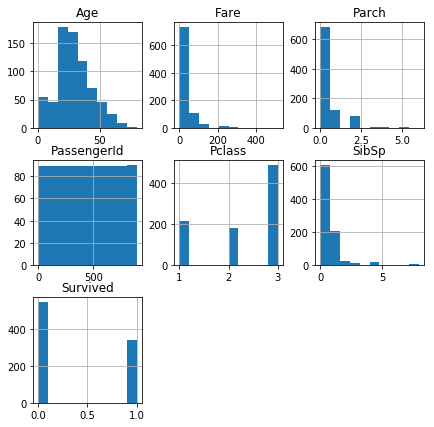

In [9]:
data.hist(figsize = (7,7));

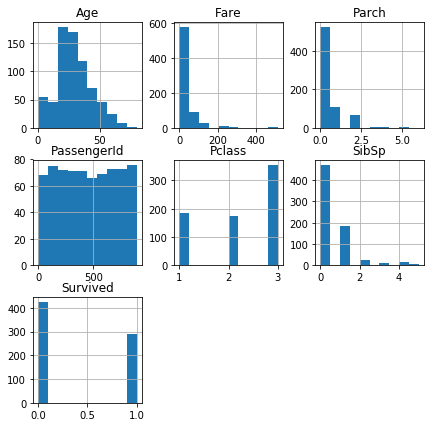

In [14]:
data[data.Age.notnull()].hist(figsize = (7,7));

### There is no difference in the distribution even after removing null values in Age. Hence adding mean to the null values

In [15]:
data.Age.fillna(data['Age'].mean(), inplace = True)

In [16]:
data.Age.isnull().sum()

0

In [92]:
# drop Cabin from the data
data.drop('Cabin', axis=1, inplace=True)

In [20]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [21]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
data.Embarked.isnull().sum()

2

In [72]:
# drop the two null values from Embarked
data.dropna(inplace=True)

In [73]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Analysis

## 1. Sex

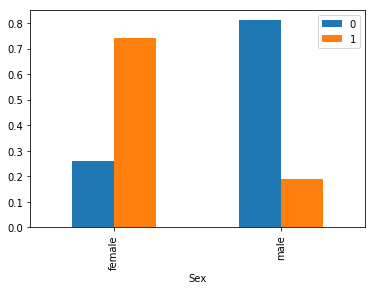

In [29]:
sex = data.groupby('Sex')['Survived'].apply(lambda x: x.value_counts(normalize = True)).unstack()
sex.plot(kind='bar');

### The survival probability of females is 50% more than males

## 2. Fare

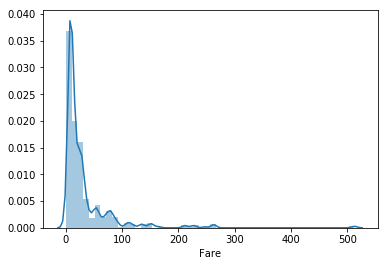

In [31]:
sns.distplot(data['Fare']);

### There were 35% more passengers who paid less than 60 dollars than other passengers 

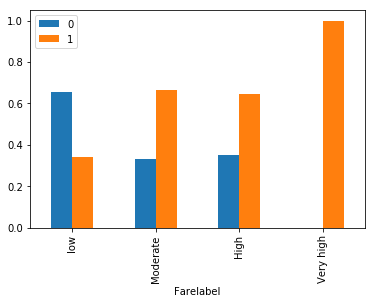

In [54]:
cut = (0,60,200,300,513)
name = ('low','Moderate', 'High','Very high')
data['Farelabel'] = pd.cut(data.Fare, cut, labels= name)
fare = data.groupby('Farelabel')['Survived'].apply(lambda x: x.value_counts(normalize = True)).unstack()
fare.plot(kind = 'bar');

In [51]:
data['Farelabel'].value_counts()

low          771
Moderate      85
High          17
Very high      3
Name: Farelabel, dtype: int64

### From the above graph we can see that Though the low fare passengers are high the probability of survival of them is very low. Whereas probabaility of survival of passengers travelling with high fare is very high.

# 3. Age

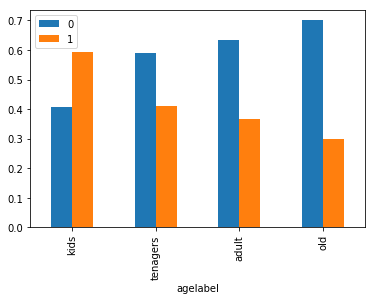

In [56]:
cut = (0,10,19,55,100)
name = ('kids','tenagers', 'adult','old')
data['agelabel']= pd.cut(data.Age, cut, labels=name)
age = data.groupby('agelabel')['Survived'].apply(lambda x:x.value_counts(normalize = True)).unstack()
age.plot(kind = 'bar');

In [58]:
data['agelabel'].value_counts()

adult       687
tenagers    100
kids         64
old          40
Name: agelabel, dtype: int64

### The probability of survival of kids is highest and the old people is least

# 4. Siblings

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


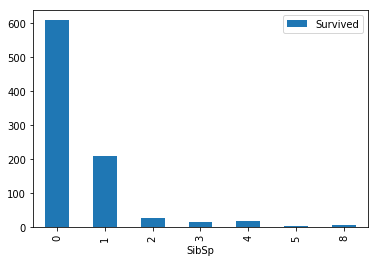

In [61]:
sib = data.groupby('SibSp')['Survived'].agg({'Survived':len})
sib.plot(kind = 'bar');

### Passengers with no siblings were among the most survived

# 5. Parch (Parents or Children)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


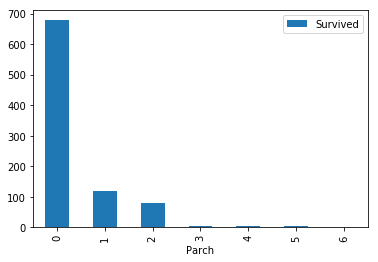

In [62]:
sib = data.groupby('Parch')['Survived'].agg({'Survived':len})
sib.plot(kind = 'bar');

### Passengers travelling alone were the most survived

# 6. Pclass

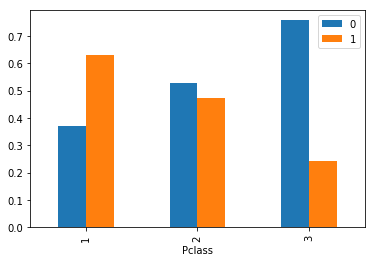

In [64]:
sib = data.groupby('Pclass')['Survived'].apply(lambda x: x.value_counts(normalize = True)).unstack()
sib.plot(kind = 'bar');

### Passengers travelling in First Class had better survival rate of 62% than other two classes

# 7. Embarked

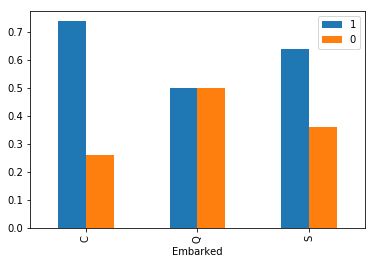

In [74]:
emb = data.groupby('Embarked')['Survived'].apply(lambda x: x.value_counts(normalize = True)).unstack()
emb.plot(kind = 'bar');

In [76]:
data['Embarked'].value_counts()

S    116
C     65
Q      2
Name: Embarked, dtype: int64

### Passengers travelling in 'S' and 'Q' had better survival rate.

In [93]:
X = data.drop(['Name','Ticket','Survived','PassengerId'], axis = 1)
X['Sex'] = pd.get_dummies(data.Sex,prefix='Sex', drop_first = True)
X['Embarked'] = pd.get_dummies(data.Embarked, prefix = 'Embarked',drop_first = True)
y = data['Survived']

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

In [95]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((137, 7), (46, 7), (137,), (46,))

In [100]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression( C = 5)
logReg.fit(X_train,y_train)

y_pred1 = logReg.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6739130434782609

In [104]:
from sklearn.tree import DecisionTreeClassifier

desCl = DecisionTreeClassifier(max_depth= 5)
desCl.fit(X_train,y_train)

y_pred2 = desCl.predict(X_test)

print(accuracy_score(y_test,y_pred2))


0.7391304347826086


In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc

rf = RandomForestClassifier(max_depth=8, n_estimators=100, n_jobs = -1)
rf.fit(X_train, y_train)

y_pred3 = rf.predict(X_test)
print(accuracy_score(y_test,y_pred3))

y_pred_prob = rf.predict_proba(X_test)
y_score_rf = y_pred_prob[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_score_rf)

0.7391304347826086


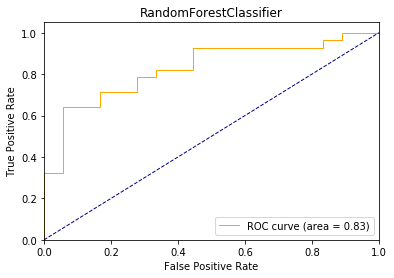

In [115]:
roc_auc_tree = auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color = 'orange',lw = 1,  label='ROC curve (area = %0.2f)' % roc_auc_tree)
plt.plot([0,1],[0,1],color = 'navy', lw=1, linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForestClassifier')
plt.legend(loc="lower right")
plt.show()